dg chips

In [11]:
!python --version

Python 3.9.12


In [9]:
pip list

Package                       Version
----------------------------- -----------
absl-py                       1.1.0
aiohttp                       3.8.1
aiosignal                     1.2.0
argon2-cffi                   21.3.0
argon2-cffi-bindings          21.2.0
astunparse                    1.6.3
async-timeout                 4.0.2
attrs                         21.4.0
backcall                      0.2.0
backports.functools-lru-cache 1.6.4
beautifulsoup4                4.11.1
bleach                        5.0.0
blinker                       1.4
brotlipy                      0.7.0
cached-property               1.5.2
cachetools                    4.2.4
certifi                       2022.5.18.1
cffi                          1.15.0
charset-normalizer            2.0.12
click                         8.1.3
cryptography                  37.0.2
cycler                        0.11.0
Cython                        0.29.30
debugpy                       1.6.0
decorator                     5.1.1
defuse

Next, change directory to wherever you created your folder. 

In [1]:
import os

# TODO: Change this to your Drive folder location
WORKING_DIRECTORY = '/home/studio-lab-user/ml635e/ir'

os.chdir(WORKING_DIRECTORY)

In [2]:
# List the contents of your working directory
# It should contain at least three folders: images, train_labels, and val_labels
!ls

_this.12a.txt  images  train  val


Now, let's install the Detecto package using pip. 

In [4]:
# Note: if it states you must restart the runtime in order to use a
# newly installed version of a package, you do NOT need to do this. 
!pip install detecto

Import everything we need in the following code block:

In [5]:
import torch
import torchvision
import matplotlib.pyplot as plt

from torchvision import transforms
from detecto import core, utils, visualize

To check that everything's working, we can try reading in one of the images from our images folder. 

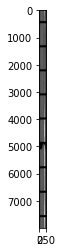

In [6]:
image = utils.read_image('images/inner_rim_210805T104053.png')
plt.imshow(image)
plt.show()

How cute! Now, we're ready to create our dataset and train our model. However, before doing so, it's a bit slow working with hundreds of individual XML label files, so we should convert them into a single CSV file to save time later down the line. 

In [7]:
# Do this twice: once for our trning labels and once for our validation labels
utils.xml_to_csv('train', 'train.csv')
utils.xml_to_csv('val', 'val.csv')

,filename,width,height,class,xmin,ymin,xmax,ymax,image_id
0,inner_rim_210805T104053.png,260,7990,Chip,2,4899,192,5231,0
1,inner_rim_210805T104112.png,260,7990,Chip,1,4013,192,4332,1
2,inner_rim_210805T104131.png,260,7990,Chip,1,1364,191,1694,2


Below, we create our dataset, applying a couple of transforms beforehand. These are optional, but they can be useful for augmenting your dataset without gathering more data. 

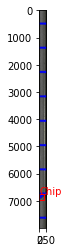

In [8]:
# Specify a list of transformations for our dataset to apply on our images
# transform_img = transforms.Compose([
#     transforms.ToPILImage(),
#     transforms.Resize(800),
#     transforms.RandomHorizontalFlip(0.5),
#     transforms.ToTensor(),
#     utils.normalize_transform(),
# ])

dataset = core.Dataset('train.csv', 'images/')

# dataset[i] returns a tuple containing our transformed image and
# and a dictionary containing label and box data
image, target = dataset[0]

# Show our image along with the box. Note: it may
# be colored oddly due to being normalized by the 
# dataset and then reverse-normalized for plotting
visualize.show_labeled_image(image, target['boxes'], target['labels'])

Finally, let's train our model! First, we create a DataLoader over our dataset to specify how we feed the images into our model. We also use our validation dataset to track the accuracy of the model throughout training. 

In [8]:
# Create our validation dataset
val_dataset = core.Dataset('val.csv', 'images/')

# Create the loader for our training dataset
loader = core.DataLoader(dataset, batch_size=2, shuffle=True)

# Create our model, passing in all unique classes we're predicting
# Note: make sure these match exactly with the labels in the XML/CSV files!
model = core.Model(['Chip'])

# Train the model! This step can take a while, so make sure you
# the GPU is turned on in Edit -> Notebook settings
losses = model.fit(loader, val_dataset, epochs=3, verbose=True)

# Plot the accuracy over time
plt.plot(losses)
plt.show()

It looks like you're training your model on a CPU. Consider switching to a GPU; otherwise, this method can take hours upon hours or even days to finish. For more information, see https://detecto.readthedocs.io/en/latest/usage/quickstart.html#technical-requirements
Epoch 1 of 3
Begin iterating over training dataset


  0%|          | 0/15 [00:00<?, ?it/s]


AssertionError: 

Let's see how well our model does on a couple images from our validation set:

In [ ]:
images = []
# Create a list of images  from val_dataset
for i in range(0, 2, 1):
    image, _ = val_dataset[i]
    images.append(image)

# Plot a  grid of the model's predictions on our  images
visualize.plot_prediction_grid(model, images, dim=(1, 3), figsize=(33, 33))

## Conclusion

Thanks for making it this far through the demo!

This is as far as the demo goes, but a great next step would be seeing how well the model works on a live video of Chihuahuas and Golden Retrievers in the same frame at the same time. To learn more about Detecto, be sure to check out the [Quickstart guide](https://detecto.readthedocs.io/en/latest/usage/quickstart.html), [Further Usage guide](https://detecto.readthedocs.io/en/latest/usage/further-usage.html), and [API docs](https://detecto.readthedocs.io/en/latest/api.html)!